# 株価予測

- [Pythonで将来予測｜株価データを使ってpythonで機械学習をしてみよう【データ加工、データ整形、予測モデル作成、株価データの分類予測、予測精度の確認まで】](https://www.youtube.com/watch?v=asfWaVpCyl8&t=1250s)
- [機械学習で株価予測（TA-LibとLightGBMを使った学習モデル構築）](https://nehori.com/nikki/2020/01/26/post-15231/)
- [超簡単Pythonで株価予測（LightGBM 利用）機械学習](https://note.com/10mohi6/n/n4b1196fea816)
- [超簡単Pythonで株価予測（Optuna・LightGBM 利用）ハイパーパラメータ自動最適化](https://note.com/10mohi6/n/n46d1bb0267b7)
- [年利30%超え！！！！！LightGBMを用いたトヨタ株自動売買シミュレーション](https://qiita.com/kt38k/items/3c0ee4251475b6407007)
- [lightgbm.plot_importance](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html)

In [1]:
# 銘柄コード
MEIGARA_CODE = '9983.T'

In [2]:
# pandasのインポート
import pandas as pd

In [3]:
# データの読み込み
df = pd.read_csv('%s_wFeatures.csv' %MEIGARA_CODE)
# データフレームの表示
df

,Date,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
0,2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,...,66754.594698,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297
2952,2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,...,66608.572426,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259
2953,2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,...,66524.527382,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186
2954,2021-12-29,2973,2,66580.0,65010.0,66580.0,65670.0,412000.0,-470.0,0.0,...,66385.713028,71738.573945,64601.426055,73522.860917,62817.139083,-1429.120009,-1443.714025,14.594017,33.701537,36.406185


In [4]:
# 各カラムの詳細確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2956 non-null   object 
 1   weeks        2956 non-null   int64  
 2   weekday      2956 non-null   int64  
 3   High         2956 non-null   float64
 4   Low          2956 non-null   float64
 5   Open         2956 non-null   float64
 6   Close        2956 non-null   float64
 7   Volume       2956 non-null   float64
 8   delta_Close  2955 non-null   float64
 9   Up           2956 non-null   float64
 10  Close_ratio  2955 non-null   float64
 11  Body         2956 non-null   float64
 12  Force_Index  2956 non-null   float64
 13  sma3         2954 non-null   float64
 14  sma5         2952 non-null   float64
 15  sma25        2932 non-null   float64
 16  sma50        2907 non-null   float64
 17  sma75        2882 non-null   float64
 18  sma100       2857 non-null   float64
 19  upper1

In [5]:
# Dateのデータ型を'datetime'型へ変更
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2956 non-null   datetime64[ns]
 1   weeks        2956 non-null   int64         
 2   weekday      2956 non-null   int64         
 3   High         2956 non-null   float64       
 4   Low          2956 non-null   float64       
 5   Open         2956 non-null   float64       
 6   Close        2956 non-null   float64       
 7   Volume       2956 non-null   float64       
 8   delta_Close  2955 non-null   float64       
 9   Up           2956 non-null   float64       
 10  Close_ratio  2955 non-null   float64       
 11  Body         2956 non-null   float64       
 12  Force_Index  2956 non-null   float64       
 13  sma3         2954 non-null   float64       
 14  sma5         2952 non-null   float64       
 15  sma25        2932 non-null   float64       
 16  sma50 

In [6]:
# 日付をインデックスにセット
df.set_index(keys='Date', inplace=True)
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,Close_ratio,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,-0.032073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,-0.007692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,-0.004770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,0.012582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,-0.009677,...,66754.594698,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,-0.017471,...,66608.572426,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,-0.003315,...,66524.527382,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186


# 不要なデータを削除する

In [7]:
# 不要カラムの削除と並べ替え
df = df[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14',
         'Up']]
df.dropna()
df

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0,NaN,200.0,6.523056e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-05,1,-0.032073,310.0,1.694394e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-06,2,-0.007692,190.0,1.123255e+10,17043.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-07,3,-0.004770,90.0,9.711911e+09,16786.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-01-08,4,0.012582,-120.0,3.196973e+10,16786.666667,16944.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,4,-0.009677,210.0,1.516273e+10,68013.333333,67790.0,69074.4,72226.8,73364.000000,73419.8,...,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297,0.0
2021-12-27,0,-0.017471,1120.0,2.339854e+10,67366.666667,67750.0,68778.0,72096.6,73236.133333,73345.5,...,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259,0.0
2021-12-28,1,-0.003315,630.0,2.309609e+10,66680.000000,67308.0,68458.8,71963.8,73106.133333,73275.6,...,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186,0.0


# 学習データと検証データと評価データに分割する

In [8]:
# 学習データを2017-01-01～2019-12-31の期間とし、df_trainに入力する
df_train = df['2017-01-01':'2019-12-31']
df_train

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,2,0.034903,-810.0,2.805625e+10,42593.333333,42934.0,42176.8,39832.2,37797.066667,37506.6,...,44959.964932,39393.635068,46351.547398,38002.052602,908.312425,1161.509897,-253.197472,57.503528,59.738228,0.0
2017-01-05,3,-0.016170,660.0,2.201051e+10,42570.000000,42728.0,42230.0,39957.4,37892.000000,37566.1,...,44991.796517,39468.203483,46372.694775,38087.305225,818.455320,1092.898982,-274.443662,49.806566,54.441182,0.0
2017-01-06,4,-0.067387,780.0,5.701806e+10,41866.666667,42018.0,42210.8,40025.8,37944.933333,37584.5,...,45034.754221,39386.845779,46446.731331,37974.868669,509.781459,976.275477,-466.494018,30.794361,39.123637,0.0
2017-01-10,1,-0.025932,-70.0,4.630806e+10,40333.333333,41224.0,42175.6,40073.6,37993.066667,37596.4,...,45148.362110,39202.837890,46634.743164,37716.456836,179.968246,817.014031,-637.045785,26.682157,35.286476,0.0
2017-01-11,2,-0.003360,150.0,2.104990e+10,38990.000000,40570.0,42099.6,40107.8,38052.400000,37612.0,...,45329.908864,38869.291136,46945.063297,37254.136703,-90.853709,635.440483,-726.294192,26.185650,34.822262,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1,0.002403,-60.0,1.347015e+10,66663.333333,66686.0,66042.4,66900.0,65825.466667,65219.8,...,68617.227559,63467.572441,69904.641339,62180.158661,86.865885,-94.308190,181.174075,55.411063,53.228697,1.0
2019-12-25,2,0.001648,-100.0,1.669494e+10,66733.333333,66654.0,66073.2,66971.8,65880.533333,65219.8,...,68667.912901,63478.487099,69965.269352,62181.130648,119.981604,-51.450231,171.431835,56.546193,53.919196,1.0
2019-12-26,3,0.005384,-420.0,1.620002e+10,66943.333333,66814.0,66112.8,67007.2,65923.600000,65236.5,...,68745.812085,63479.787915,70062.318128,62163.281872,173.277604,-6.504664,179.782268,60.270096,56.198323,0.0


In [9]:
# 検証データを2020-01-01～2020-12-31の期間とし、df_validに入力する
df_valid = df['2020-01-01':'2020-12-31']
df_valid

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,0,-0.030000,740.0,4.749556e+10,64640.000000,65600.0,65882.4,66770.4,65903.866667,65222.1,...,68765.433292,62999.366708,70206.949937,61557.850063,-270.788958,-46.951993,-223.836965,26.381133,33.591965,1.0
2020-01-07,1,0.003172,70.0,4.596378e+10,63766.666667,64878.0,65741.6,66650.0,65883.466667,65217.3,...,68777.263644,62705.936356,70295.095466,61188.104534,-449.456177,-127.452830,-322.003347,28.759223,35.027314,0.0
2020-01-08,2,-0.018498,380.0,5.178714e+10,62793.333333,63850.0,65558.4,66511.2,65855.066667,65205.0,...,68888.748594,62228.051406,70553.922892,60562.877108,-677.648942,-237.492052,-440.156890,23.717141,30.829323,1.0
2020-01-09,3,0.027062,-760.0,5.804710e+10,63030.000000,63428.0,65441.2,66417.6,65843.733333,65201.7,...,68810.009024,62072.390976,70494.413536,60387.986464,-714.692858,-332.932213,-381.760645,40.553102,41.644310,0.0
2020-01-10,4,-0.027760,1010.0,1.039262e+11,62610.000000,62826.0,65208.8,66297.4,65805.733333,65185.8,...,68694.245487,61723.354513,70436.968230,59980.631770,-876.767803,-441.699331,-435.068471,32.144341,35.369733,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,3,0.018975,-1040.0,3.124910e+10,84886.666667,84630.0,84818.8,80374.2,75691.733333,72016.1,...,87748.675465,81888.924535,89213.613197,80423.986803,1094.310813,1528.618156,-434.307344,61.767794,61.178946,1.0
2020-12-25,4,0.004655,-390.0,1.786824e+10,85520.000000,84982.0,84941.6,80707.6,75965.200000,72300.3,...,87855.471267,82027.728733,89312.406900,80570.793100,1138.300861,1450.554697,-312.253837,64.201500,62.581820,1.0
2020-12-28,0,0.006719,-430.0,3.479476e+10,86380.000000,85576.0,85172.4,81037.2,76242.933333,72608.8,...,87734.956723,82609.843277,89016.235085,81328.564915,1206.061714,1401.656101,-195.594386,67.569085,64.580514,1.0


In [10]:
# 評価データを2021-01-01～2021-12-31の期間とし、df_testに入力する
df_test  = df['2021-01-01':'2021-12-31']
df_test

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0,-0.015356,2920.0,5.937370e+10,91443.333333,89510.0,86134.8,82125.6,77231.466667,73599.3,...,90660.630293,81608.969707,92923.545439,79346.054561,2117.177944,1651.969998,465.207946,72.619582,70.057776,0.0
2021-01-05,1,-0.020648,930.0,5.001545e+10,90896.666667,90080.0,86336.4,82467.2,77524.666667,73902.9,...,90935.474272,81737.325728,93235.011408,79437.788592,2076.261786,1736.828356,339.433430,60.263378,61.739314,0.0
2021-01-06,2,-0.024784,1680.0,5.497611e+10,89060.000000,90092.0,86377.2,82758.8,77802.933333,74182.2,...,90979.580323,81774.819677,93280.770485,79473.629515,1844.247567,1758.312198,85.935369,49.193850,53.671603,1.0
2021-01-07,3,0.015984,-400.0,6.114704e+10,88160.000000,89600.0,86408.8,83072.6,78102.133333,74469.4,...,91053.881080,81763.718920,93376.421620,79441.178380,1752.336170,1757.116992,-4.780822,55.037702,57.438730,1.0
2021-01-08,4,0.038257,-2110.0,8.875795e+10,89013.333333,89452.0,86590.4,83434.2,78451.733333,74785.6,...,91677.407702,81503.392298,94220.911553,78959.888447,1929.985803,1791.690754,138.295048,65.799216,64.910548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,4,-0.009677,210.0,1.516273e+10,68013.333333,67790.0,69074.4,72226.8,73364.000000,73419.8,...,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297,0.0
2021-12-27,0,-0.017471,1120.0,2.339854e+10,67366.666667,67750.0,68778.0,72096.6,73236.133333,73345.5,...,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259,0.0
2021-12-28,1,-0.003315,630.0,2.309609e+10,66680.000000,67308.0,68458.8,71963.8,73106.133333,73275.6,...,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186,0.0


In [11]:
# 学習データを説明変数（X_train）と目的変数（y_train）に分ける
X_train = df_train[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_train = df_train[['Up']]

# 学習データの説明変数と目的変数を確認
print(X_train)
print(y_train)

            weekday  Close_ratio    Body   Force_Index          sma3     sma5  \
Date                                                                            
2017-01-04        2     0.034903  -810.0  2.805625e+10  42593.333333  42934.0   
2017-01-05        3    -0.016170   660.0  2.201051e+10  42570.000000  42728.0   
2017-01-06        4    -0.067387   780.0  5.701806e+10  41866.666667  42018.0   
2017-01-10        1    -0.025932   -70.0  4.630806e+10  40333.333333  41224.0   
2017-01-11        2    -0.003360   150.0  2.104990e+10  38990.000000  40570.0   
...             ...          ...     ...           ...           ...      ...   
2019-12-24        1     0.002403   -60.0  1.347015e+10  66663.333333  66686.0   
2019-12-25        2     0.001648  -100.0  1.669494e+10  66733.333333  66654.0   
2019-12-26        3     0.005384  -420.0  1.620002e+10  66943.333333  66814.0   
2019-12-27        4    -0.020083  1070.0  3.354759e+10  66650.000000  66658.0   
2019-12-30        0    -0.01

In [12]:
# 検証データを説明変数（X_valid）と目的変数（y_valid）に分ける
X_valid = df_valid[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_valid = df_valid[['Up']]

# 検証データの説明変数と目的変数を確認
print(X_valid)
print(y_valid)

            weekday  Close_ratio    Body   Force_Index          sma3     sma5  \
Date                                                                            
2020-01-06        0    -0.030000   740.0  4.749556e+10  64640.000000  65600.0   
2020-01-07        1     0.003172    70.0  4.596378e+10  63766.666667  64878.0   
2020-01-08        2    -0.018498   380.0  5.178714e+10  62793.333333  63850.0   
2020-01-09        3     0.027062  -760.0  5.804710e+10  63030.000000  63428.0   
2020-01-10        4    -0.027760  1010.0  1.039262e+11  62610.000000  62826.0   
...             ...          ...     ...           ...           ...      ...   
2020-12-24        3     0.018975 -1040.0  3.124910e+10  84886.666667  84630.0   
2020-12-25        4     0.004655  -390.0  1.786824e+10  85520.000000  84982.0   
2020-12-28        0     0.006719  -430.0  3.479476e+10  86380.000000  85576.0   
2020-12-29        1     0.044994 -3580.0  7.540862e+10  88010.000000  86854.0   
2020-12-30        2     0.01

In [13]:
# 評価データを説明変数（X_test）と目的変数（y_test）に分ける
X_test  = df_test[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_test  = df_test[['Up']]

# 評価データの説明変数と目的変数を確認
print(X_test)
print(y_test)

            weekday  Close_ratio    Body   Force_Index          sma3     sma5  \
Date                                                                            
2021-01-04        0    -0.015356  2920.0  5.937370e+10  91443.333333  89510.0   
2021-01-05        1    -0.020648   930.0  5.001545e+10  90896.666667  90080.0   
2021-01-06        2    -0.024784  1680.0  5.497611e+10  89060.000000  90092.0   
2021-01-07        3     0.015984  -400.0  6.114704e+10  88160.000000  89600.0   
2021-01-08        4     0.038257 -2110.0  8.875795e+10  89013.333333  89452.0   
...             ...          ...     ...           ...           ...      ...   
2021-12-24        4    -0.009677   210.0  1.516273e+10  68013.333333  67790.0   
2021-12-27        0    -0.017471  1120.0  2.339854e+10  67366.666667  67750.0   
2021-12-28        1    -0.003315   630.0  2.309609e+10  66680.000000  67308.0   
2021-12-29        2    -0.007106   910.0  2.705604e+10  66056.666667  66782.0   
2021-12-30        3    -0.00

In [14]:
# matplotlibのインポート
from matplotlib import pyplot as plt
%matplotlib inline

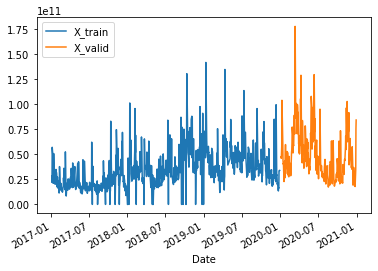

In [15]:
# 学習データと検証データの勢力指数（Force_Index）の折れ線グラフ作成
X_train['Force_Index'].plot(kind='line')
X_valid['Force_Index'].plot(kind='line')

# グラフの凡例を設定
plt.legend(['X_train', 'X_valid'])

# グラフの表示
plt.show()

# 予測モデルを作成する

In [16]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import optuna
import csv

# ログを非表示にしたいときは、optuna.logging.disable_default_handler()
# 逆に、表示にしたいときは、optuna.logging.enable_default_handler()
optuna.logging.disable_default_handler()

In [17]:
targetParams = {}
reader = csv.DictReader(open('predStockPrice-LightGBM-params.csv', 'r').readlines())
for r in reader:
    seed = r.pop('seed')
    targetParams[seed] = r

In [18]:
def mybest(tunedparam):
    clf = lgb.LGBMRegressor(**dict(tunedparam))
    clf.fit(
        X_train,
        y_train,
    )

    y_pred = clf.predict(X_valid)
    return clf

In [19]:
# 最もaccracy_score値の高かった試行でのハイパーパラメータを使って改めてモデルを構築
clf = mybest(targetParams['61'])

[LightGBM] [Warning] lambda_l1 is set=5.918112013717653e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.918112013717653e-07
[LightGBM] [Warning] feature_fraction is set=0.45405353303948814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45405353303948814
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.18773637135861548, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18773637135861548
[LightGBM] [Warning] bagging_fraction is set=0.4778965606079249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4778965606079249


In [20]:
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(np.asarray(y_test), y_pred)

print('f1       : %s' %f1_score(y_test, y_pred > 0.5, average='macro'))
print('auc      : %s' %auc(fpr, tpr))
print('accuracy : %s' %accuracy_score(np.asarray(y_test), np.round(y_pred)))
print('precision: %s' %precision_score(np.asarray(y_test), np.round(y_pred)))

f1       : 0.5136179994427417
auc      : 0.527027027027027
accuracy : 0.5346938775510204
precision: 0.4819277108433735


# 特徴量重要度を図示する

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

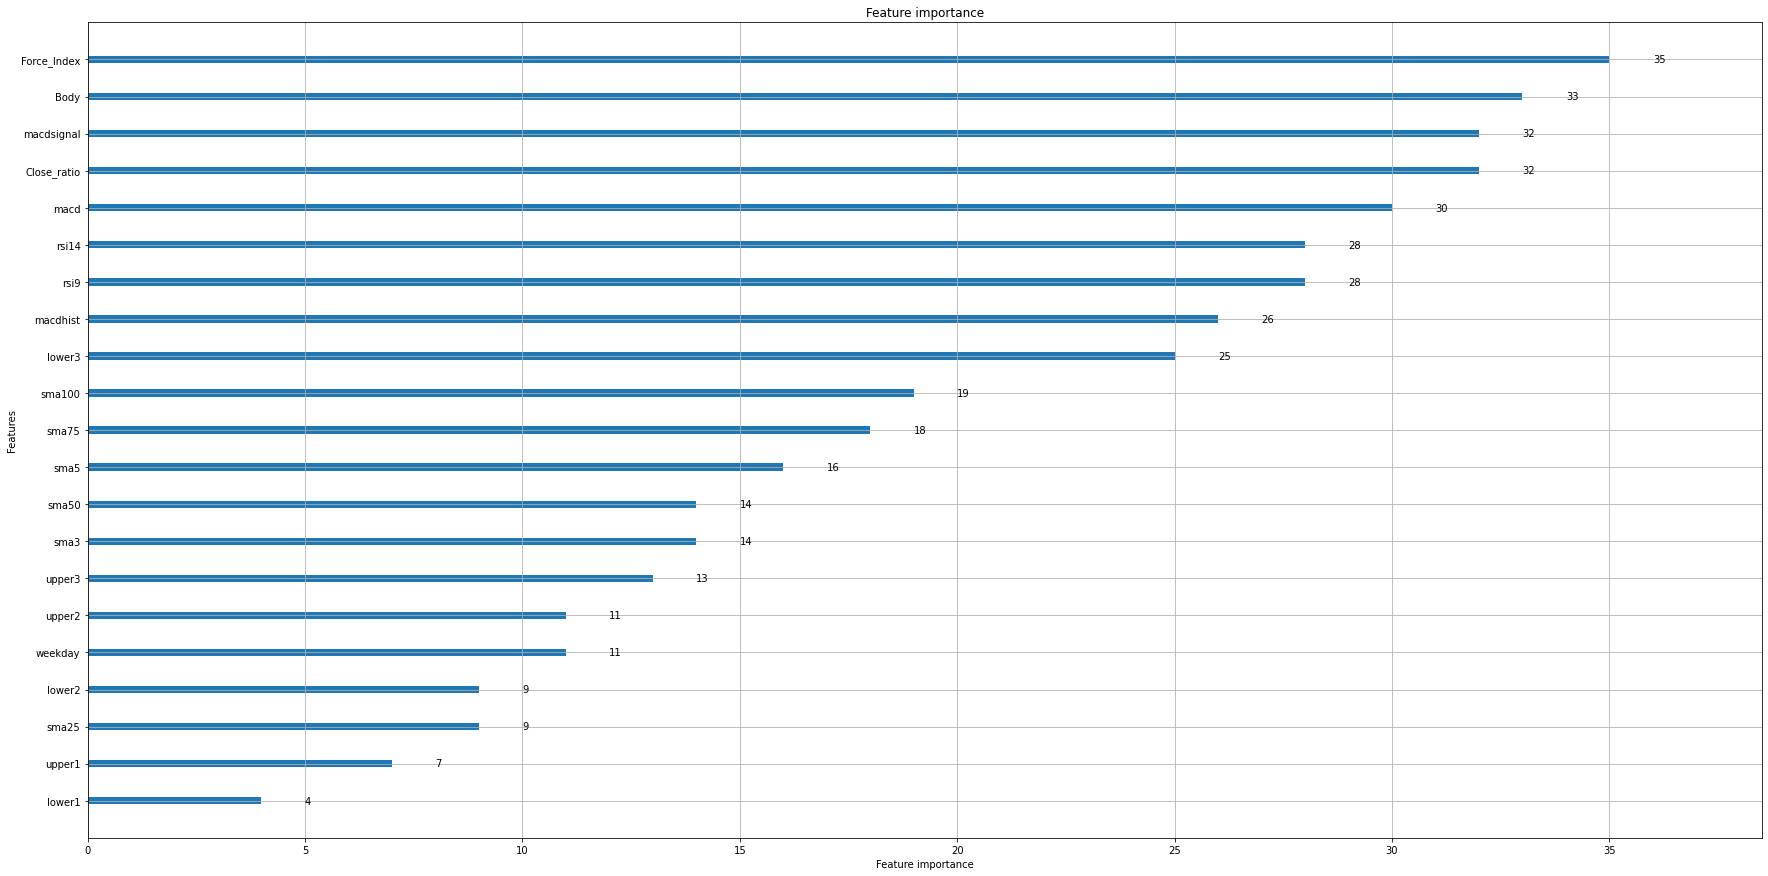

In [21]:
# 重要度としては「特徴量が分岐（ノード）の条件式で使用された回数」（＝デフォルト）
lgb.plot_importance(clf, figsize=(30, 15), max_num_features=30, importance_type='split')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

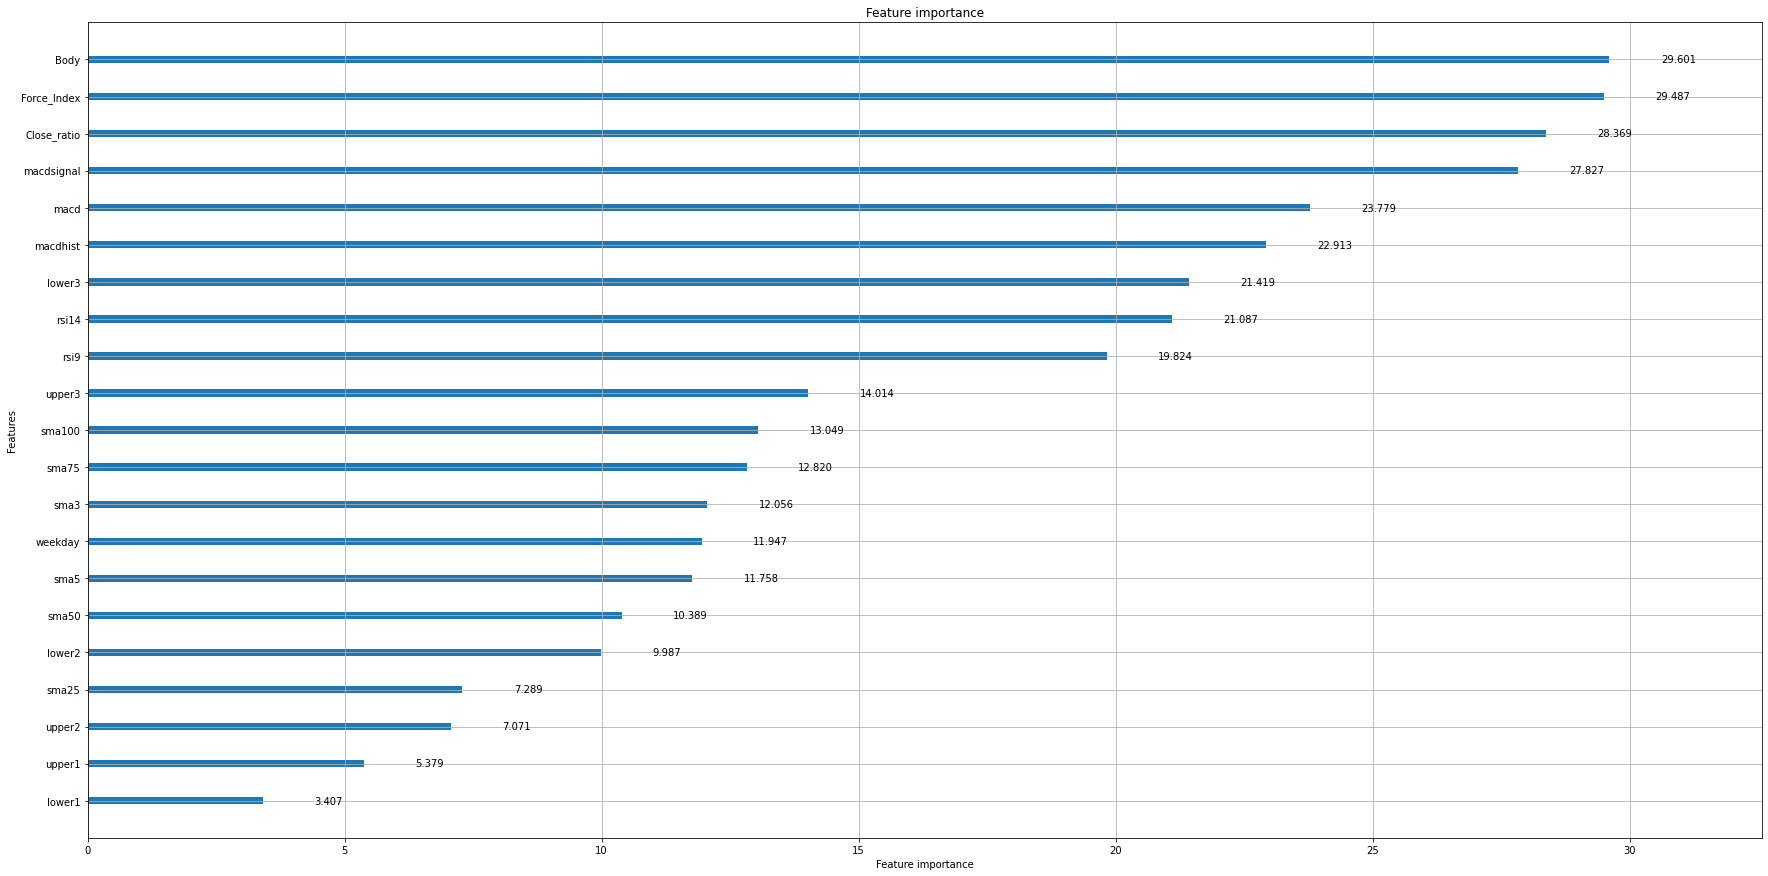

In [22]:
# 重要度としては「特徴量がある分岐（ノード）において目的関数の改善に寄与した度合い」
lgb.plot_importance(clf, figsize=(30, 15), max_num_features=30, importance_type='gain')

In [23]:
import csv
# 決定木をDataFrameに変換
clf.booster_.trees_to_dataframe().to_csv('predStockPrice-LightGBM-dicisiontrees.csv', encoding='utf-8', index=False, header=True, quotechar='"', sep=',', quoting=csv.QUOTE_ALL)

In [24]:
df_tree = pd.read_csv('predStockPrice-LightGBM-dicisiontrees.csv')

In [25]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tree_index         928 non-null    int64  
 1   node_depth         928 non-null    int64  
 2   node_index         928 non-null    object 
 3   left_child         414 non-null    object 
 4   right_child        414 non-null    object 
 5   parent_index       828 non-null    object 
 6   split_feature      414 non-null    object 
 7   split_gain         414 non-null    float64
 8   threshold          414 non-null    float64
 9   decision_type      414 non-null    object 
 10  missing_direction  414 non-null    object 
 11  missing_type       414 non-null    object 
 12  value              928 non-null    float64
 13  weight             928 non-null    int64  
 14  count              928 non-null    int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 108.9+ KB


In [26]:
df_tree.head(10)

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S1,0-S2,NaN,macd,1.914450,175.775440,<=,left,None,0.500662,0,367
1,0,2,0-S1,0-S4,0-L2,0-S0,macd,0.860922,-179.005602,<=,left,None,0.508130,179,179
2,0,3,0-S4,0-L0,0-L5,0-S1,upper2,0.224697,46301.196762,<=,left,None,0.503134,118,118
3,0,4,0-L0,NaN,NaN,0-S4,NaN,NaN,NaN,NaN,NaN,NaN,0.507715,56,56
4,0,4,0-L5,NaN,NaN,0-S4,NaN,NaN,NaN,NaN,NaN,NaN,0.498988,62,62
5,0,3,0-L2,NaN,NaN,0-S1,NaN,NaN,NaN,NaN,NaN,NaN,0.517757,61,61
6,0,2,0-S2,0-L1,0-S3,0-S0,sma100,0.564674,45451.350000,<=,left,None,0.493688,188,188
7,0,3,0-L1,NaN,NaN,0-S2,NaN,NaN,NaN,NaN,NaN,NaN,0.486743,72,72
8,0,3,0-S3,0-L3,0-L4,0-S2,sma25,1.476940,57503.200000,<=,left,None,0.498014,116,116
9,0,4,0-L3,NaN,NaN,0-S3,NaN,NaN,NaN,NaN,NaN,NaN,0.508904,60,60


In [27]:
df_tree = df_tree[df_tree['split_feature'].notnull()]

In [28]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 925
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tree_index         414 non-null    int64  
 1   node_depth         414 non-null    int64  
 2   node_index         414 non-null    object 
 3   left_child         414 non-null    object 
 4   right_child        414 non-null    object 
 5   parent_index       314 non-null    object 
 6   split_feature      414 non-null    object 
 7   split_gain         414 non-null    float64
 8   threshold          414 non-null    float64
 9   decision_type      414 non-null    object 
 10  missing_direction  414 non-null    object 
 11  missing_type       414 non-null    object 
 12  value              414 non-null    float64
 13  weight             414 non-null    int64  
 14  count              414 non-null    int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 51.8+ KB


In [29]:
df_tree.head(10)

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S1,0-S2,NaN,macd,1.914450,175.775440,<=,left,None,0.500662,0,367
1,0,2,0-S1,0-S4,0-L2,0-S0,macd,0.860922,-179.005602,<=,left,None,0.508130,179,179
2,0,3,0-S4,0-L0,0-L5,0-S1,upper2,0.224697,46301.196762,<=,left,None,0.503134,118,118
6,0,2,0-S2,0-L1,0-S3,0-S0,sma100,0.564674,45451.350000,<=,left,None,0.493688,188,188
8,0,3,0-S3,0-L3,0-L4,0-S2,sma25,1.476940,57503.200000,<=,left,None,0.498014,116,116
11,1,1,1-S0,1-S2,1-S1,NaN,macdsignal,1.517430,253.838329,<=,left,None,0.000000,0,367
12,1,2,1-S2,1-L0,1-L3,1-S0,Close_ratio,0.880993,0.000831,<=,left,None,0.006472,184,184
15,1,2,1-S1,1-L1,1-S3,1-S0,lower2,1.077210,45521.236981,<=,left,None,-0.006381,183,183
17,1,3,1-S3,1-L2,1-L4,1-S1,sma75,0.621416,53820.600000,<=,left,None,-0.000476,115,115
20,2,1,2-S0,2-S2,2-S1,NaN,macdsignal,1.229740,253.838329,<=,left,None,0.000000,0,367


In [30]:
#df_tree.groupby('split_feature').agg({'split_gain':'sum', 'tree_index':'count'}).sort_values('split_gain', ascending=False)

In [31]:
df_tmp = df_tree.groupby('split_feature').agg({'split_gain':'sum', 'tree_index':'count'})
df_tmp.rename(columns={'split_gain':'gain', 'tree_index':'split'}, inplace=True)

In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Body to weekday
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gain    21 non-null     float64
 1   split   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 504.0+ bytes


In [33]:
df_tmp.head()

,gain,split
split_feature,,
Body,29.601424,33
Close_ratio,28.369423,32
Force_Index,29.487254,35
lower1,3.407068,4
lower2,9.987415,9


In [34]:
df_tmp.sort_values('gain', ascending=False)

,gain,split
split_feature,,
Body,29.601424,33
Force_Index,29.487254,35
Close_ratio,28.369423,32
macdsignal,27.826851,32
macd,23.779391,30
macdhist,22.913035,26
lower3,21.418913,25
rsi14,21.086669,28
rsi9,19.823773,28


In [35]:
df_tmp.sort_values('split', ascending=False)

,gain,split
split_feature,,
Force_Index,29.487254,35
Body,29.601424,33
Close_ratio,28.369423,32
macdsignal,27.826851,32
macd,23.779391,30
rsi14,21.086669,28
rsi9,19.823773,28
macdhist,22.913035,26
lower3,21.418913,25
